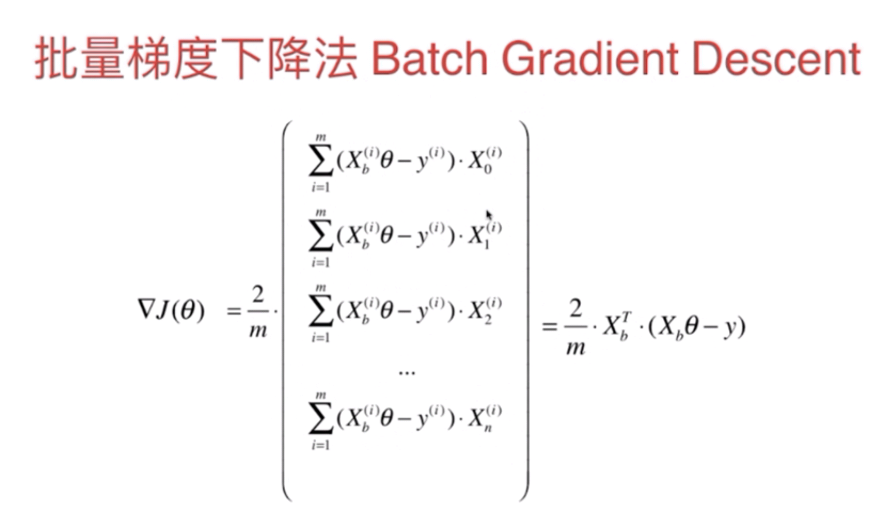

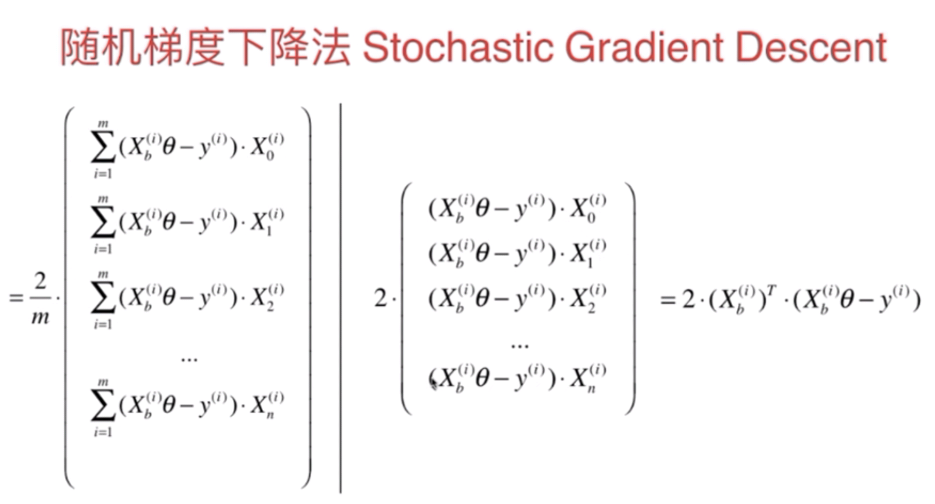

# 随机梯度下降算法原理：
> 随机梯度下降法，其实和批量梯度下降法原理类似，区别在与求梯度时没有用所有的m个样本的数据，而是仅仅选取一个样本j来求梯度，仅仅是在搜索方向上省略，从而降低计算时间。

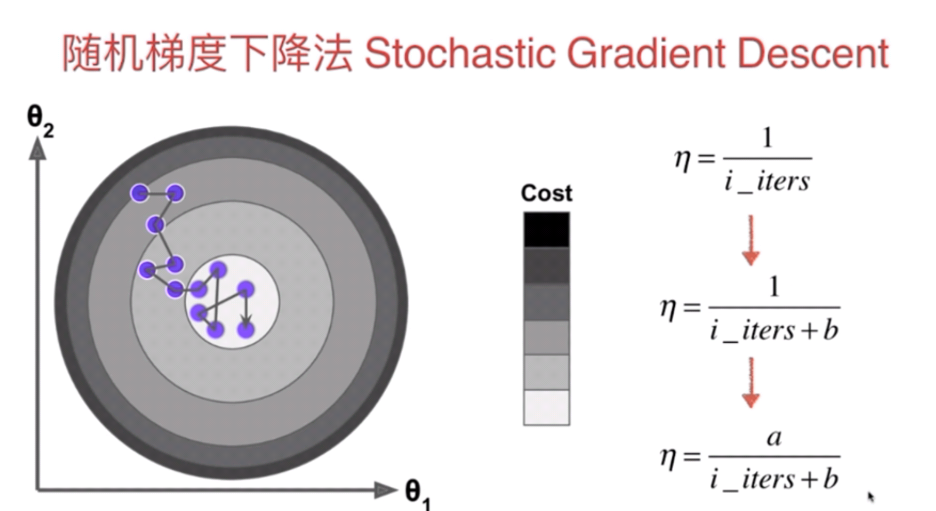

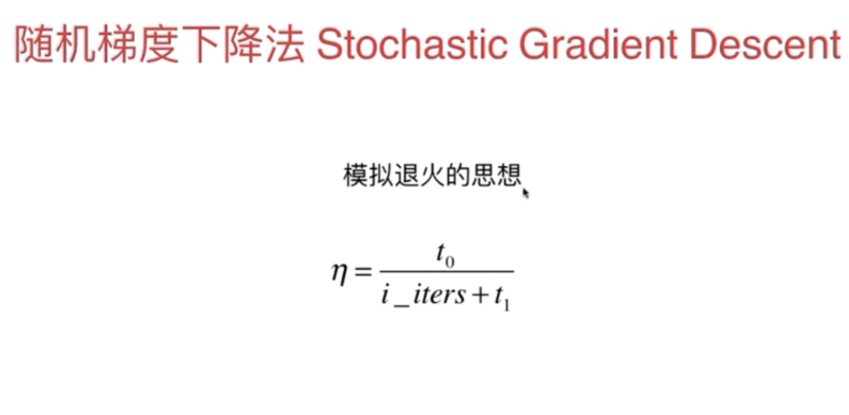

### 学习率随着训练循环次数增加而变小--模拟退火思想

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

In [22]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    # res = np.empty(len(theta))
    # res[0] = np.sum(X_b.dot(theta) - y)
    # for i in range(1, len(theta)):
    #     res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    # return res * 2 / len(X_b)
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

In [23]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

CPU times: user 1.47 s, sys: 332 ms, total: 1.81 s
Wall time: 1.64 s


In [24]:
theta

array([3.0121655 , 4.00456805])

### 随机梯度下降法

In [25]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2. 

In [26]:
def sgd(X_b, y, initial_theta, n_iters):
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0/(t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
       rand_i = np.random.randint(len(X_b))
       gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])#仅仅选用一个样本作为求梯度方向
       theta = theta - learning_rate(cur_iter) * gradient
    
    return theta

In [27]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

CPU times: user 364 ms, sys: 9.02 ms, total: 373 ms
Wall time: 390 ms


In [28]:
theta

array([3.00778897, 4.04779863])

### 以上def sgd(X_b, y, initial_theta, n_iters)方法实现上有问题

> 不能保证梯度下降中每次迭代寻找样本集合中每个样本作为求梯度方向的机率相等

> 需要优化，如下

In [29]:
def sgd(X_b, y, initial_theta, n_iters, t0=5, t1=50):

    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    m = len(X_b)

    #使用两次循环，一次遍历循环，一次样本循环，保证每次循环所有样本遍历一遍
    for cur_iter in range(n_iters):
        indexes = np.random.permutation(m)
        X_b_new = X_b[indexes]
        y_new = y[indexes]
        for i in range(m):
            gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
            theta = theta - learning_rate(cur_iter * m + i) * gradient

    return theta

In [30]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

KeyboardInterrupt: 